In [1]:
%load_ext autoreload
%autoreload 2
from CellTracker.test_matching_models import match_by_fpm, rotation_align_by_fpm,\
    load_fpm, ids_to_pairs, accuracy
from CellTracker.fpm import FlexiblePointMatcherConv, FlexiblePointMatcherOriginal
from CellTracker.trackerlite import plot_initial_matching
import numpy as np

Test data: https://osf.io/t7dzu/

In [24]:
match_model = FlexiblePointMatcherConv(num_skip=2)
fpm_model = load_fpm(fpm_model_path="./fpm_models/fpm_conv_2skip_worm3_180_deg.h5", match_model=match_model)

In [25]:
match_model = FlexiblePointMatcherConv(num_skip=2)
fpm_model = load_fpm(fpm_model_path="./fpm_models/fpm_conv_2skip_worm3_180_deg.h5", match_model=match_model)
import glob
npy_files = glob.glob("fDNC_Data/test_tracking/real_jeff_all" + "/*.npy")
accs = []
for i in range(100):
    print(f"{i}...", end="\r")
    points1 = np.load(npy_files[i])
    points2 = np.load(npy_files[i+200])
    pairs_gt = ids_to_pairs(points1[:, 3], points2[:, 3])
    pairs = match_by_fpm(fpm_model, points1=points1[:, :3], points2=points2[:, :3],
                ids_ref=points1[:, 3], ids_tgt=points2[:, 3], match_method="greedy")
    accs.append(accuracy(pairs, pairs_gt))
print(f"average acc = {np.mean(accs)}, std={np.std(accs)}")

average acc = 0.41464104709442945, std=0.12155640963417608


In [28]:
match_model = FlexiblePointMatcherConv(num_skip=2)
fpm_model = load_fpm(fpm_model_path="./fpm_models/fpm_conv_2skip_worm3_180_deg.h5", match_model=match_model)
match_model2 = FlexiblePointMatcherConv(num_skip=2)
fpm_model_2 = load_fpm(fpm_model_path="./fpm_models/fpm_conv_2skip_worm3_10_deg.h5", match_model=match_model2)

import glob
npy_files = glob.glob("fDNC_Data/test_tracking/real_jeff_all" + "/*.npy")
accs = []
for i in range(100):
    print(f"{i}...", end="\r")
    points1 = np.load(npy_files[i])
    points2 = np.load(npy_files[i+200])
    pairs_gt = ids_to_pairs(points1[:, 3], points2[:, 3])
    aligned_t1, norm_t2, pairs = rotation_align_by_fpm(fpm_model_rot, points1=points1[:, :3], 
                                                                  points2=points2[:, :3],
                ids_ref=points1[:, 3], ids_tgt=points2[:, 3], match_method="greedy")

    pairs_2 = match_by_fpm(fpm_model_2, aligned_t1, norm_t2,
                ids_ref=points1[:, 3], ids_tgt=points2[:, 3], match_method="greedy")

    accs.append(accuracy(pairs_2, pairs_gt))
print(f"average acc = {np.mean(accs)}, std={np.std(accs)}")

average acc = 0.733314615286512, std=0.16937916214940035


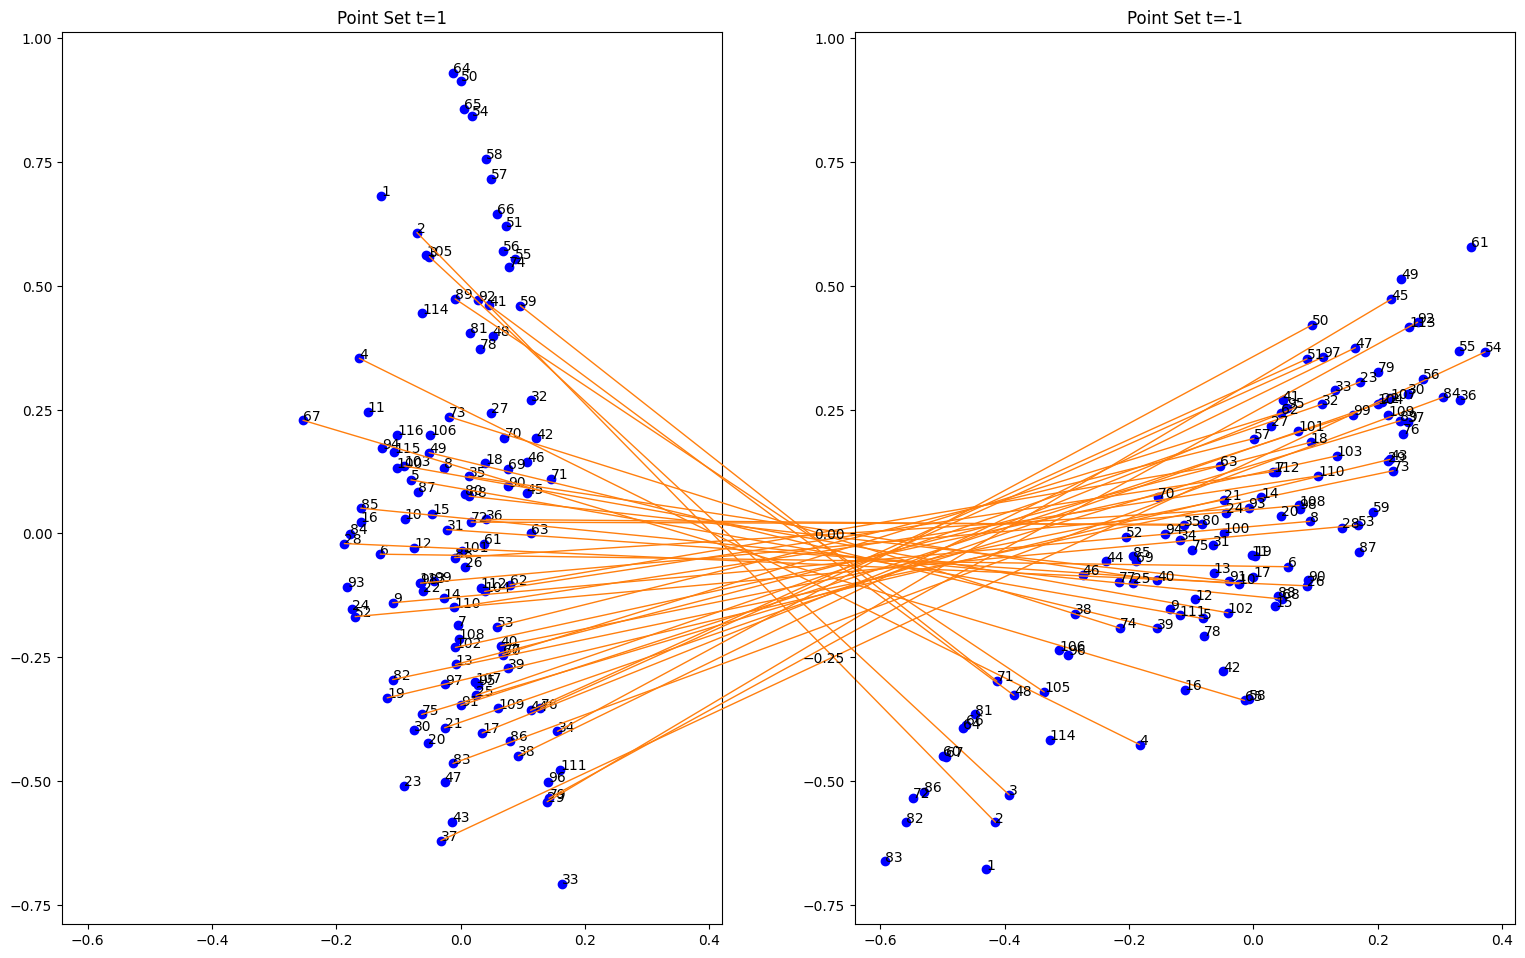

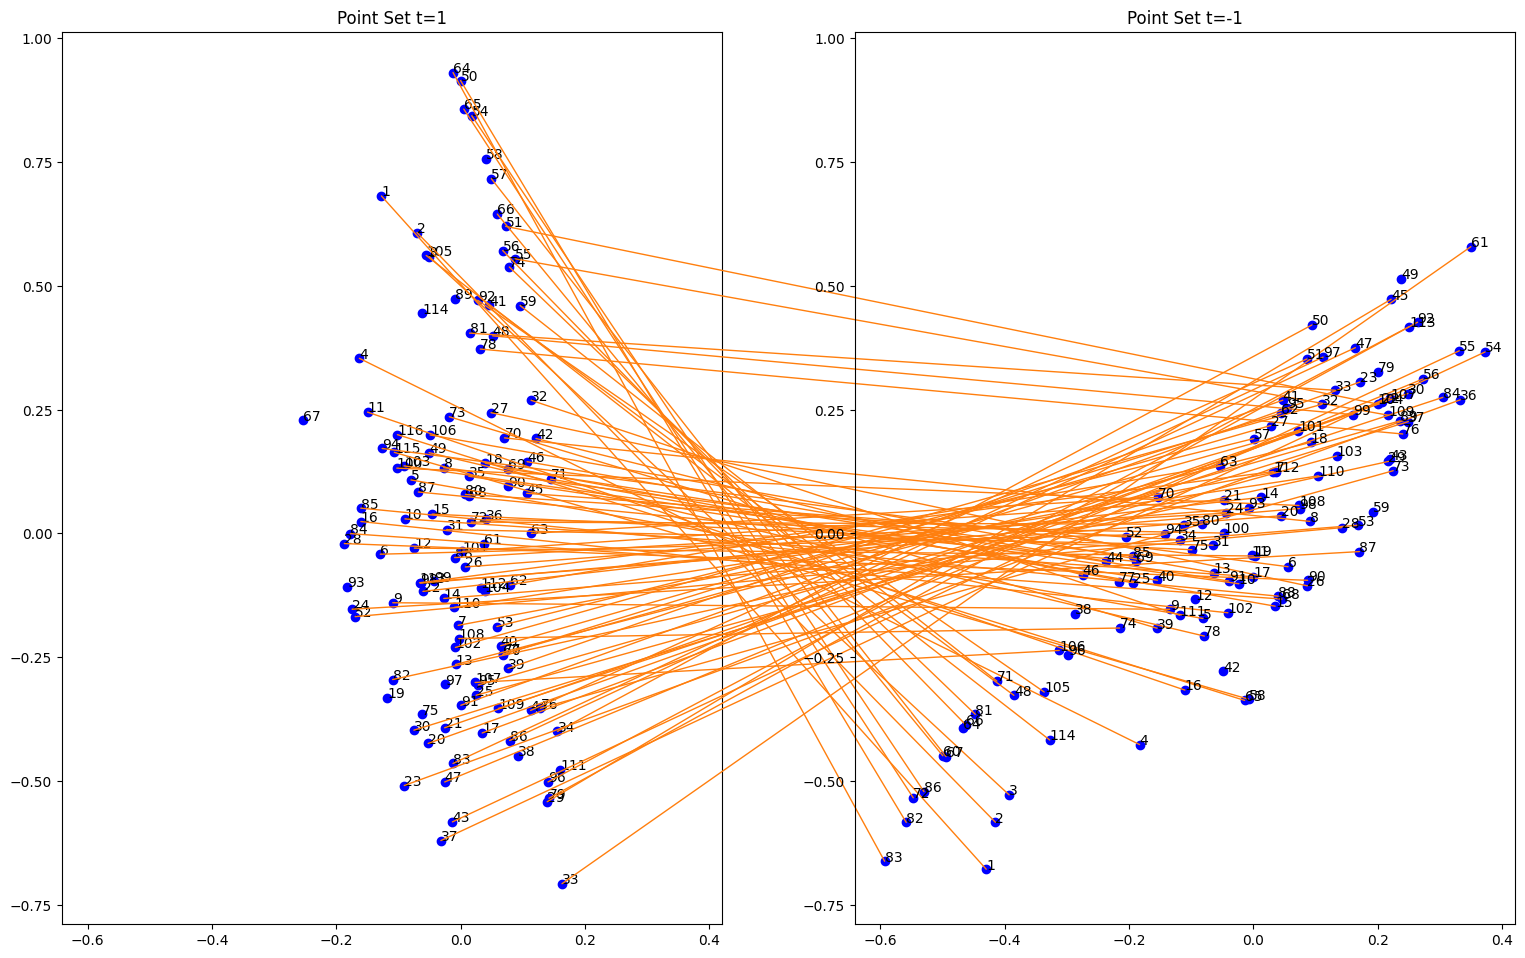

In [21]:
match_model = FlexiblePointMatcherConv(num_skip=2)
fpm_model_rot = load_fpm(fpm_model_path="./fpm_models/fpm_conv_2skip_worm3_180_deg.h5", match_model=match_model)

import glob
npy_files = glob.glob("fDNC_Data/test_tracking/real_jeff_all" + "/*.npy")
points1 = np.load(npy_files[0])
points2 = np.load(npy_files[100])
pairs_gt = ids_to_pairs(points1[:, 3], points2[:, 3])
aligned_t1, norm_t2, pairs = rotation_align_by_fpm(fpm_model_rot, points1=points1[:, :3],points2=points2[:, :3],
            ids_ref=points1[:, 3], ids_tgt=points2[:, 3], match_method="greedy")
fig = plot_initial_matching(points1[:, :3],points2[:, :3], pairs_gt, 1, -1)
fig = plot_initial_matching(points1[:, :3],points2[:, :3], pairs, 1, -1)

In [22]:
accuracy(pairs, pairs_gt)

0.41304347826086957

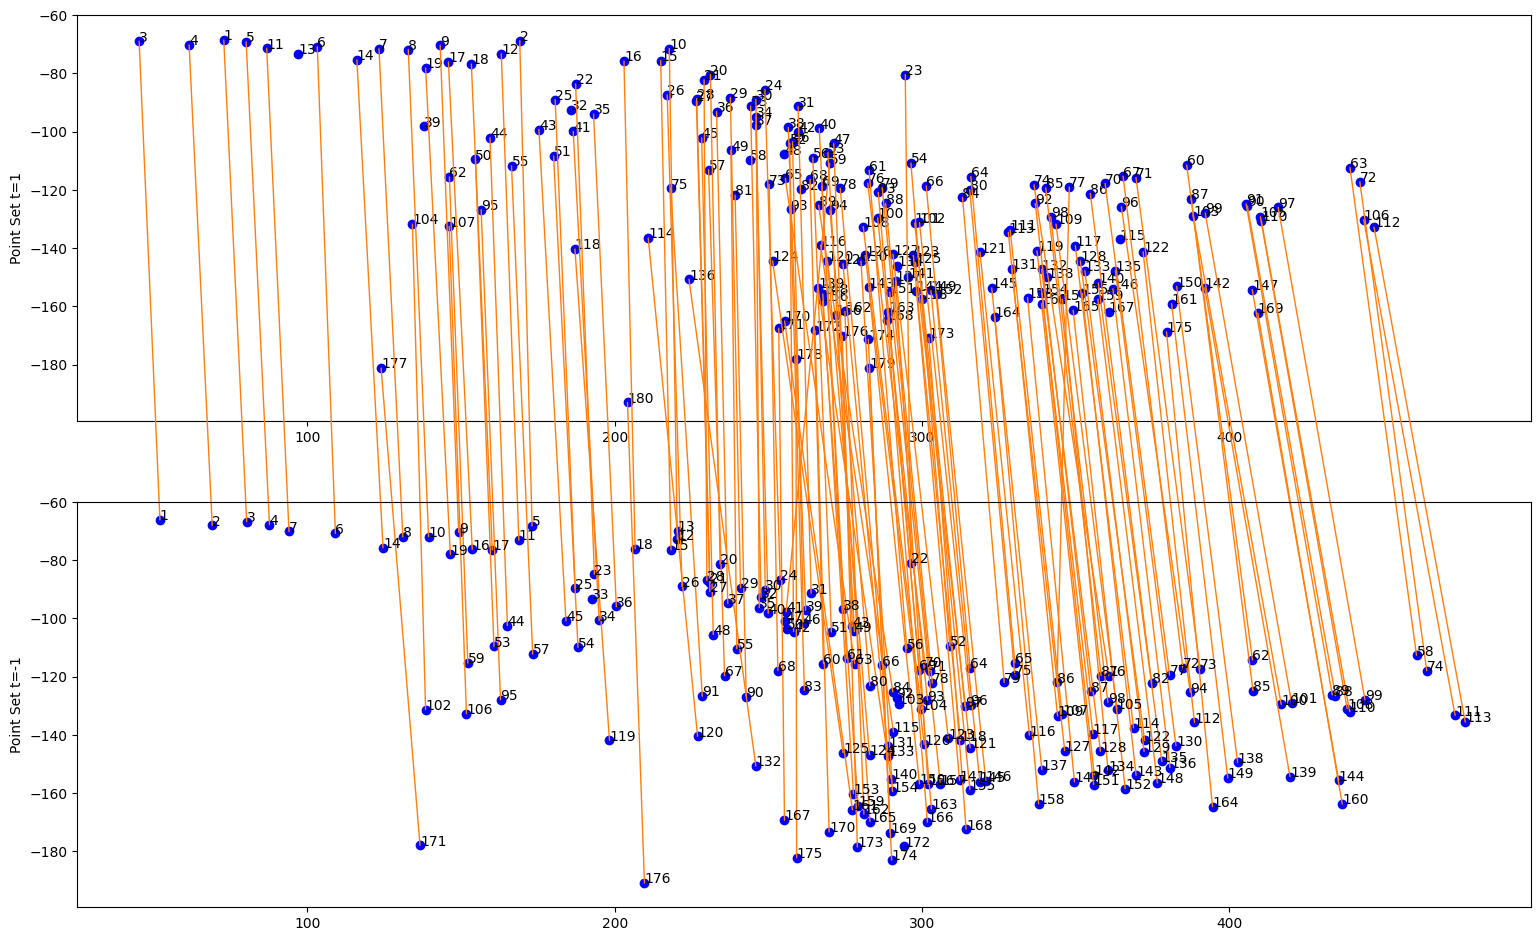

In [7]:
points1 = np.loadtxt("worm3_points_t1.csv")
points2 = np.loadtxt("worm3_points_t2.csv")
match_model2 = FlexiblePointMatcherConv(num_skip=2)
fpm_model = load_fpm(fpm_model_path="./fpm_models/ffn_worm3.h5", match_model=match_model2)

pairs = match_by_fpm(fpm_model, points1, points2, match_method="greedy")

fig = plot_initial_matching(points1,points2, pairs, 1, -1)

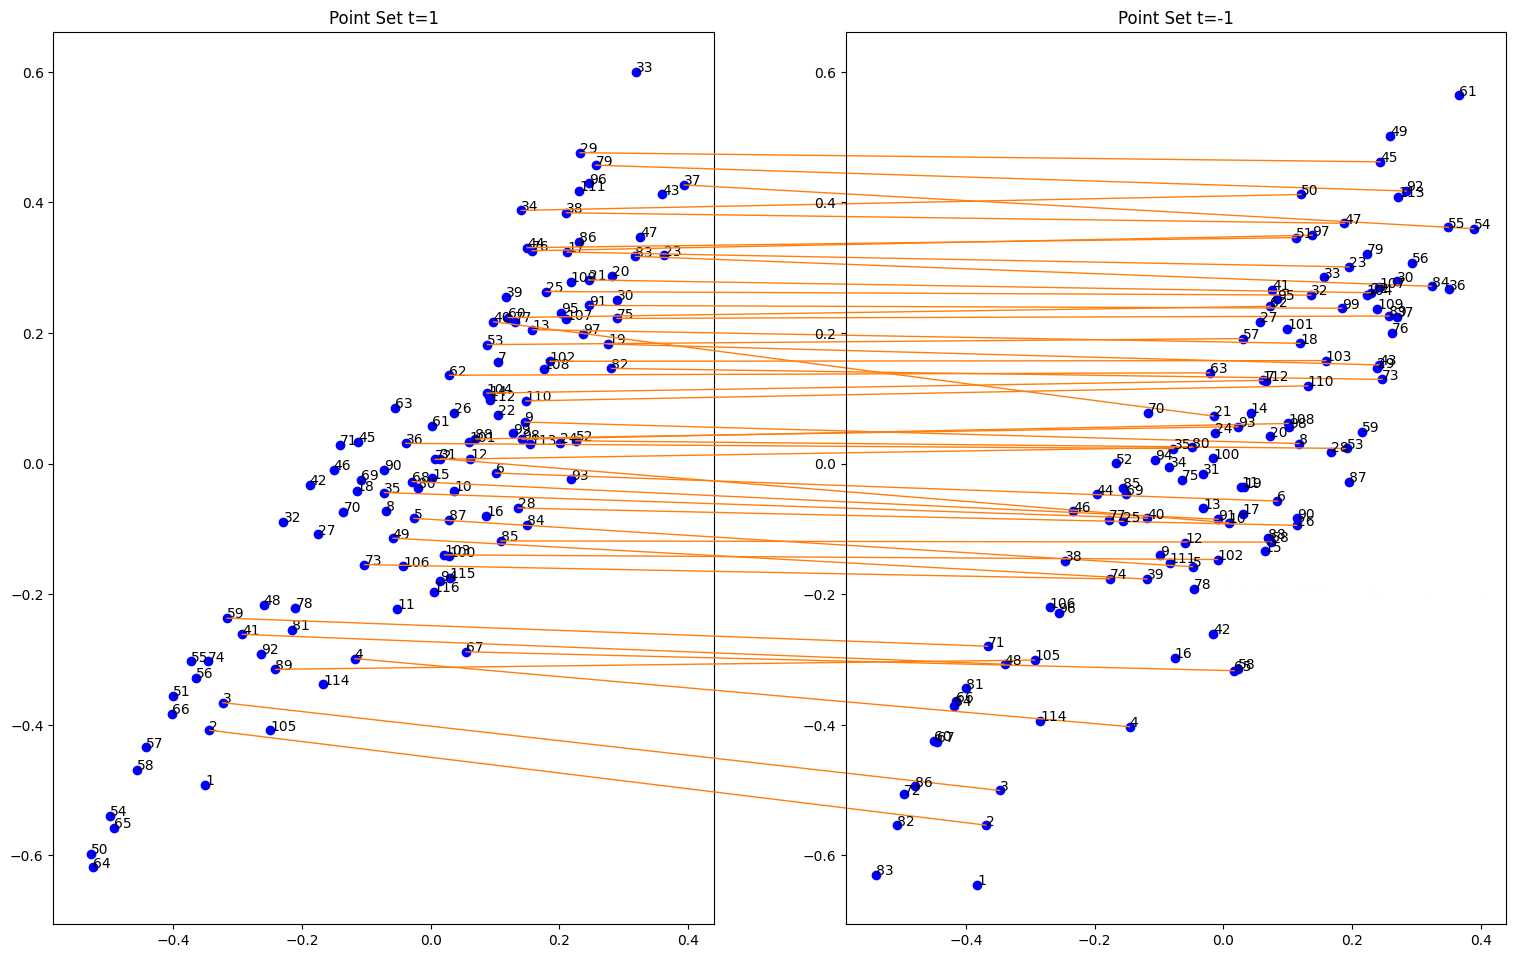

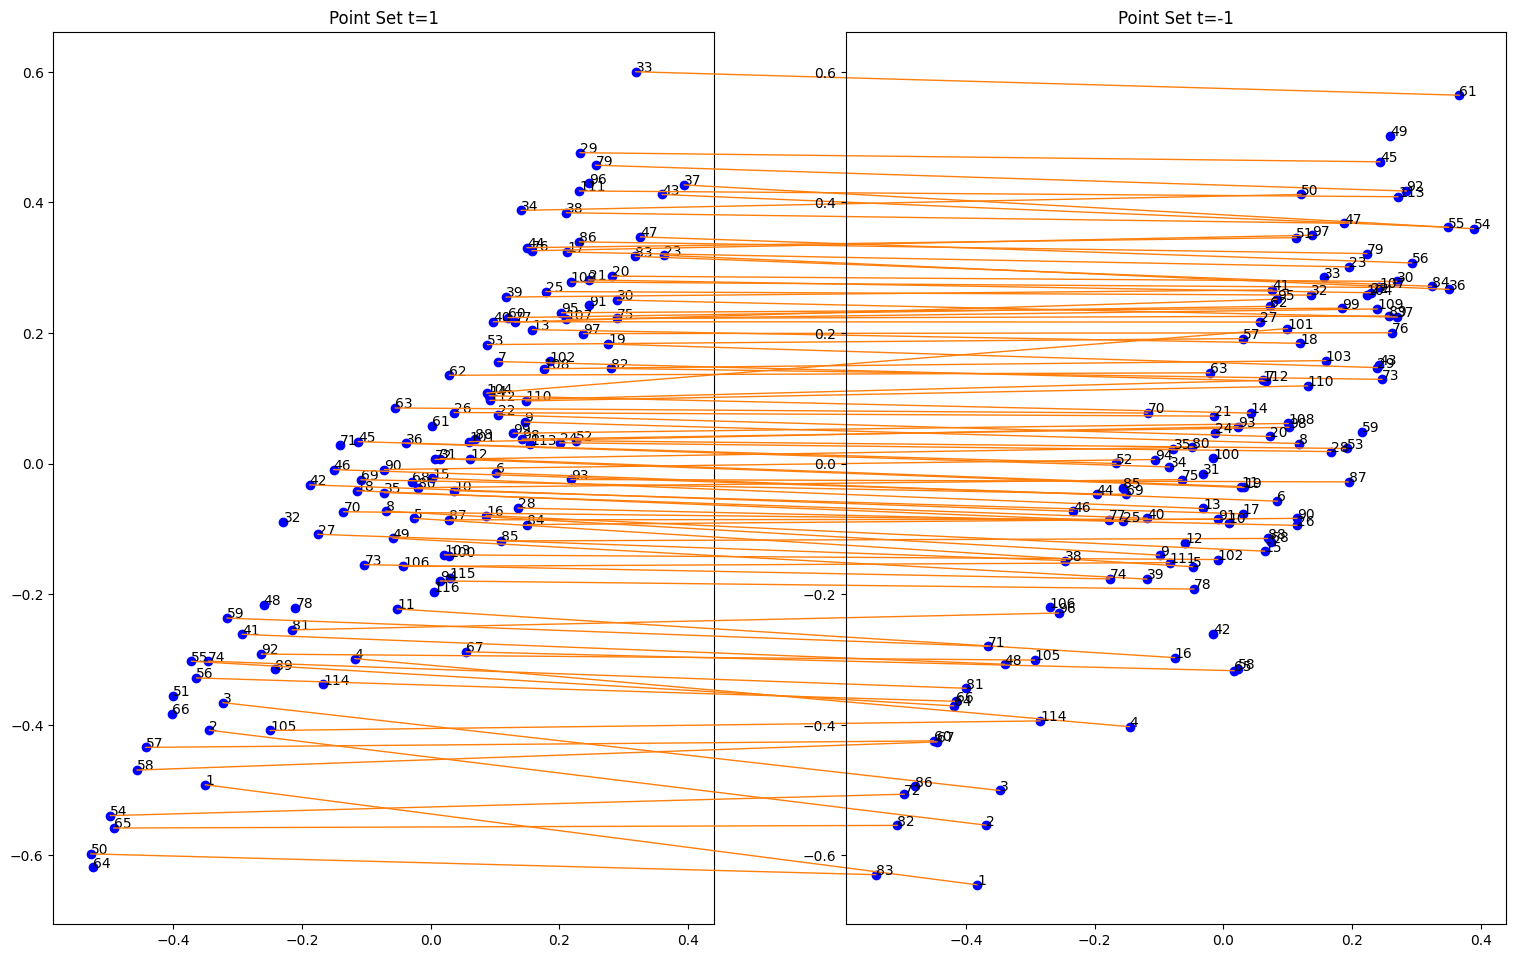

0.7391304347826086

In [23]:
match_model2 = FlexiblePointMatcherConv(num_skip=2)
fpm_model = load_fpm(fpm_model_path="./fpm_models/fpm_conv_2skip_worm3_10_deg.h5", match_model=match_model2)

pairs = match_by_fpm(fpm_model, aligned_t1, norm_t2,
            ids_ref=points1[:, 3], ids_tgt=points2[:, 3], match_method="greedy")
fig = plot_initial_matching(aligned_t1[:, :3],norm_t2[:, :3], pairs_gt, 1, -1)
fig = plot_initial_matching(aligned_t1[:, :3],norm_t2[:, :3], pairs, 1, -1)
accuracy(pairs, pairs_gt)